In [1]:
# Import essential libraries for data handling
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
sms_df = pd.read_csv("C://Users//Vaibhavi//Desktop//ML_CAS//SMSSpamCollection", sep='\t', header=None, names=['label', 'message'])

In [3]:
sms_df.sample(n=5, random_state=1)

,label,message
1078,ham,"Yep, by the pretty sculpture"
4028,ham,"Yes, princess. Are you going to make me moan?"
958,ham,Welp apparently he retired
4642,ham,Havent.
4674,ham,I forgot 2 ask ü all smth.. There's a card on ...


In [4]:
# Print dataset dimensions (rows, columns)
print(f"The dataset has {sms_df.shape[0]} rows and {sms_df.shape[1]} columns.")

The dataset has 5572 rows and 2 columns.


### 1)Data Cleaning

In [5]:
sms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
# Rename columns for clarity and consistency
sms_df.rename(columns={'label': 'target', 'message': 'text'}, inplace=True)

# Show a sample of 5 records after renaming
sms_df.sample(n=5, random_state=42)

,target,text
3245,ham,Squeeeeeze!! This is christmas hug.. If u lik ...
944,ham,And also I've sorta blown him off a couple tim...
1044,ham,Mmm thats better now i got a roast down me! i...
2484,ham,Mm have some kanji dont eat anything heavy ok
812,ham,So there's a ring that comes with the guys cos...


In [7]:
# Import LabelEncoder for encoding target labels
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

In [8]:
# Encode target labels: 'ham' -> 0, 'spam' -> 1
sms_df['target'] = label_encoder.fit_transform(sms_df['target'])

In [9]:
sms_df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# Check for missing values in each column
missing_values = sms_df.isnull().sum()
print(missing_values)

target    0
text      0
dtype: int64


In [11]:
# Check how many duplicate rows exist in the dataset
duplicate_count = sms_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 403


In [12]:
# Remove duplicate rows, keeping the first occurrence
sms_df.drop_duplicates(keep='first', inplace=True)

In [13]:
# Verify that all duplicate rows have been removed
print(f"Duplicates remaining after removal: {sms_df.duplicated().sum()}")

Duplicates remaining after removal: 0


In [14]:
# Display the shape of the DataFrame after cleaning
print(f"Dataset dimensions after cleaning: {sms_df.shape[0]} rows and {sms_df.shape[1]} columns.")

Dataset dimensions after cleaning: 5169 rows and 2 columns.


### EDA

In [15]:
# Display the first 5 records to verify data after cleaning
sms_df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# Show the distribution of the target classes
print(sms_df['target'].value_counts())

target
0    4516
1     653
Name: count, dtype: int64


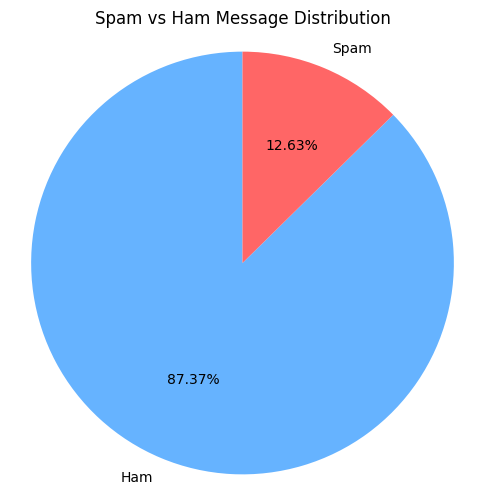

In [17]:
import matplotlib.pyplot as plt

# Plot class distribution as a pie chart
counts = sms_df['target'].value_counts()
labels = ['Ham', 'Spam']
#Percentages displayed with two decimal places (autopct="%0.2f%%").
plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct="%0.2f%%", startangle=90, colors=['#66b3ff','#ff6666'])
plt.title("Spam vs Ham Message Distribution")
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

In [18]:
import nltk

In [19]:
# Download 'punkt' tokenizer models (required for tokenization)
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vaibhavi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
# Calculate the number of characters in each SMS message
sms_df['num_characters'] = sms_df['text'].apply(len)

In [21]:
sms_df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Vaibhavi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [23]:
# Calculate the number of words in each SMS message using nltk tokenizer
sms_df['num_words'] = sms_df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [24]:
sms_df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
import nltk
nltk.download('punkt')

# Number of characters in each SMS
sms_df['num_characters'] = sms_df['text'].apply(len)

# Number of words in each SMS
sms_df['num_words'] = sms_df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

# Number of sentences in each SMS
sms_df['num_sentences'] = sms_df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vaibhavi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [26]:
# Feature engineering: add text stats columns
sms_df['num_characters'] = sms_df['text'].apply(len)
sms_df['num_words'] = sms_df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
sms_df['num_sentences'] = sms_df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

sms_df.head()


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
# Get summary statistics for the new text features
sms_df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,79.344554,18.593538,1.974076
std,58.437457,13.402779,1.458967
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
# Summary statistics for ham messages (target == 0)
sms_df[sms_df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.905890,17.267715,1.827724
std,56.715046,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
# Summary statistics for spam messages (target == 1)
sms_df[sms_df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.704441,27.762634,2.986217
std,29.821348,6.993008,1.494815
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [30]:
import seaborn as sns

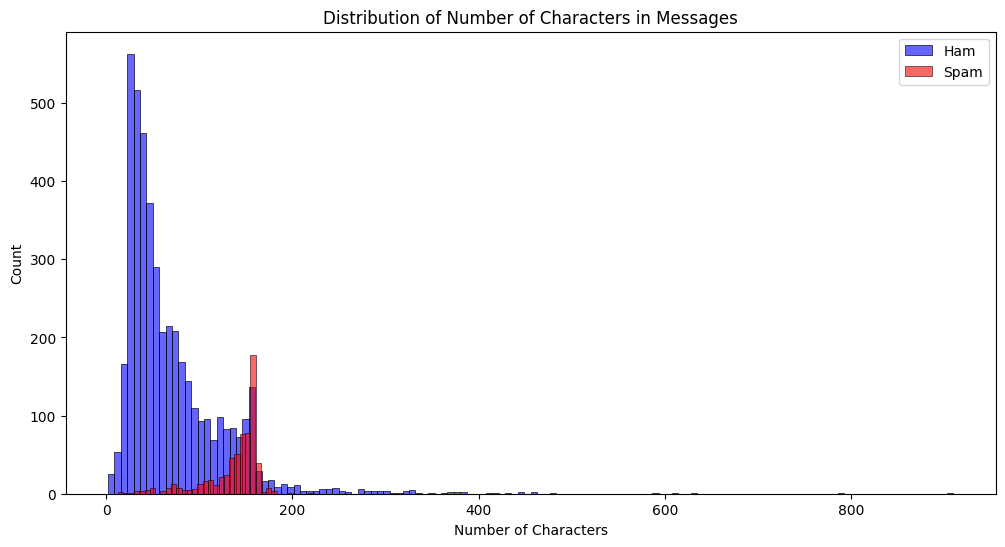

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.histplot(sms_df[sms_df['target'] == 0]['num_characters'], label='Ham', color='blue', kde=False, alpha=0.6)
sns.histplot(sms_df[sms_df['target'] == 1]['num_characters'], label='Spam', color='red', kde=False, alpha=0.6)
plt.legend()
plt.title('Distribution of Number of Characters in Messages')
plt.xlabel('Number of Characters')
plt.ylabel('Count')
plt.show()


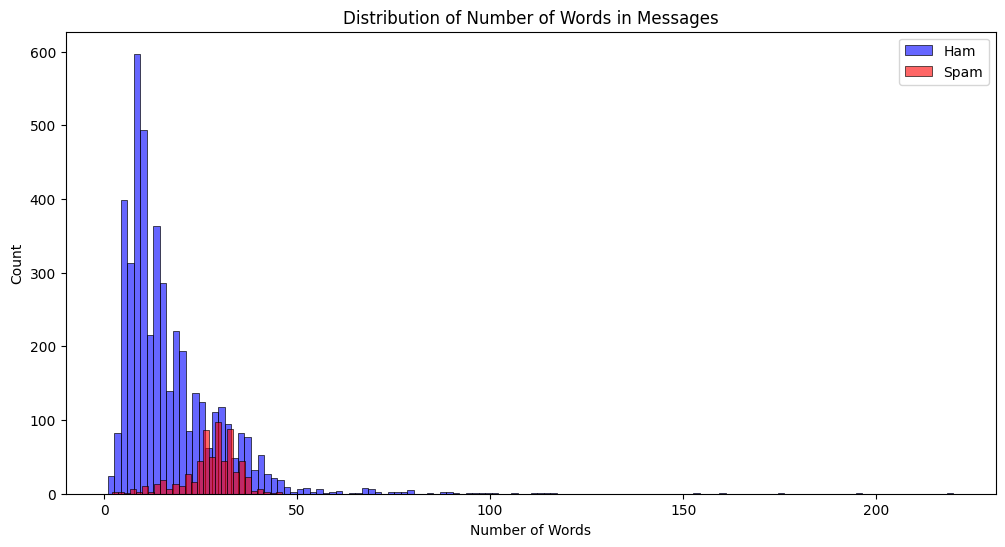

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(sms_df[sms_df['target'] == 0]['num_words'], label='Ham', color='blue', kde=False, alpha=0.6)
sns.histplot(sms_df[sms_df['target'] == 1]['num_words'], label='Spam', color='red', kde=False, alpha=0.6)
plt.legend()
plt.title('Distribution of Number of Words in Messages')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.show()

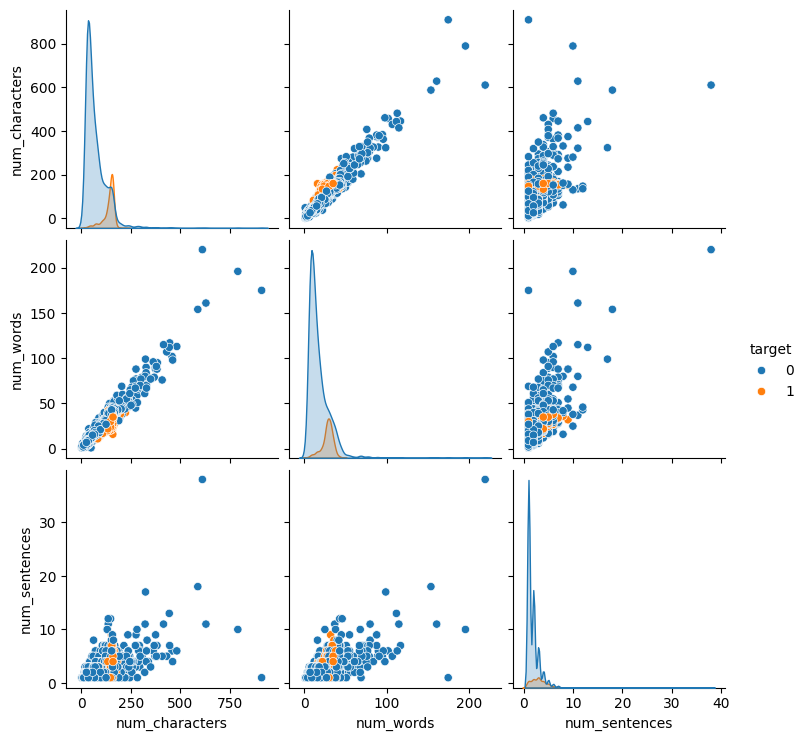

In [33]:
sns.pairplot(sms_df[['num_characters', 'num_words', 'num_sentences', 'target']], hue='target')

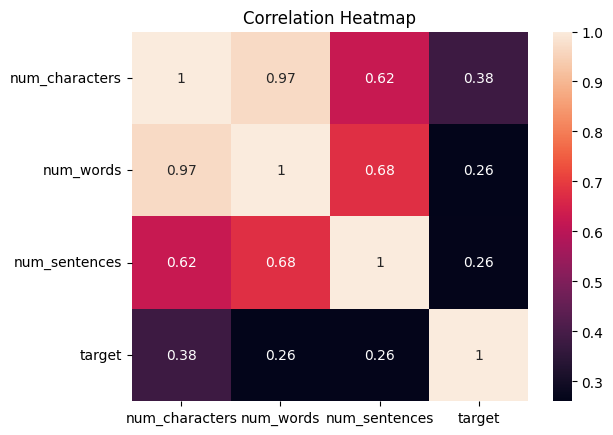

In [34]:
sns.heatmap(sms_df[['num_characters', 'num_words', 'num_sentences', 'target']].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

### 3. Data Preprocessing

In [35]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

ps = PorterStemmer()

In [36]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vaibhavi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
stop_words = set(stopwords.words('english'))

In [38]:
# import string
# from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

nltk.download('stopwords')
nltk.download('punkt')  # make sure tokenizer data is downloaded

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def transform_text(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    
    tokens = [token for token in tokens if token.isalnum()]
    tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]
    tokens = [ps.stem(token) for token in tokens]
    
    return " ".join(tokens)

sms_df['transformed_text'] = sms_df['text'].apply(transform_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vaibhavi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vaibhavi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [39]:
# Example text
example_text = "I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

# Apply your transform_text function
transformed = transform_text(example_text)

print(transformed)


gon na home soon want talk stuff anymor tonight k cri enough today


In [55]:
sms_df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [57]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
print(ps.stem('going'))

go


In [58]:
sms_df['transformed_text'] = sms_df['text'].apply(transform_text)

In [59]:
sms_df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


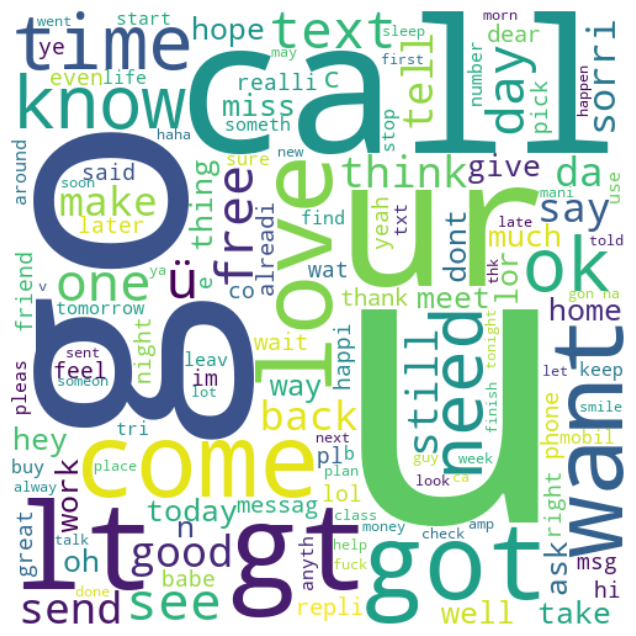

In [62]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

all_words = ' '.join(sms_df['transformed_text'])

wc.generate(all_words)

plt.figure(figsize=(8,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


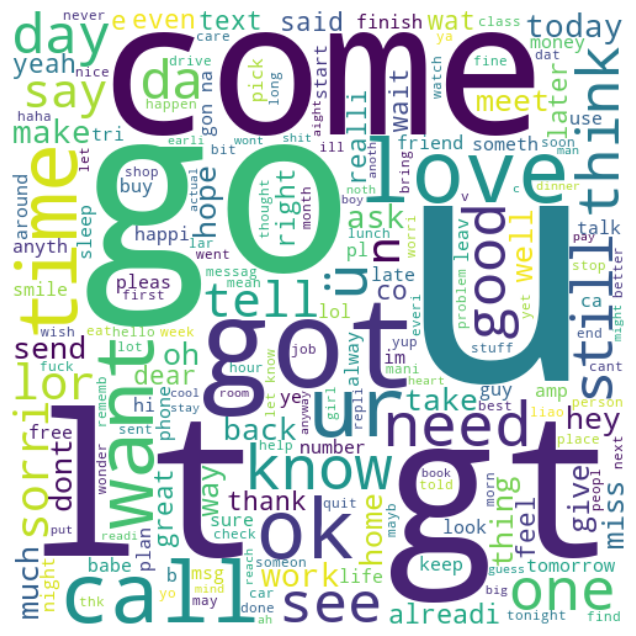

In [63]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create WordCloud object
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

# Generate word cloud for ham messages
ham_wc = wc.generate(sms_df[sms_df['target'] == 0]['transformed_text'].str.cat(sep=" "))

# Plot the word cloud
plt.figure(figsize=(8,8))
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


In [65]:
sms_df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [67]:
spam_corpus = []
for msg in sms_df[sms_df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [68]:
len(spam_corpus)

9982

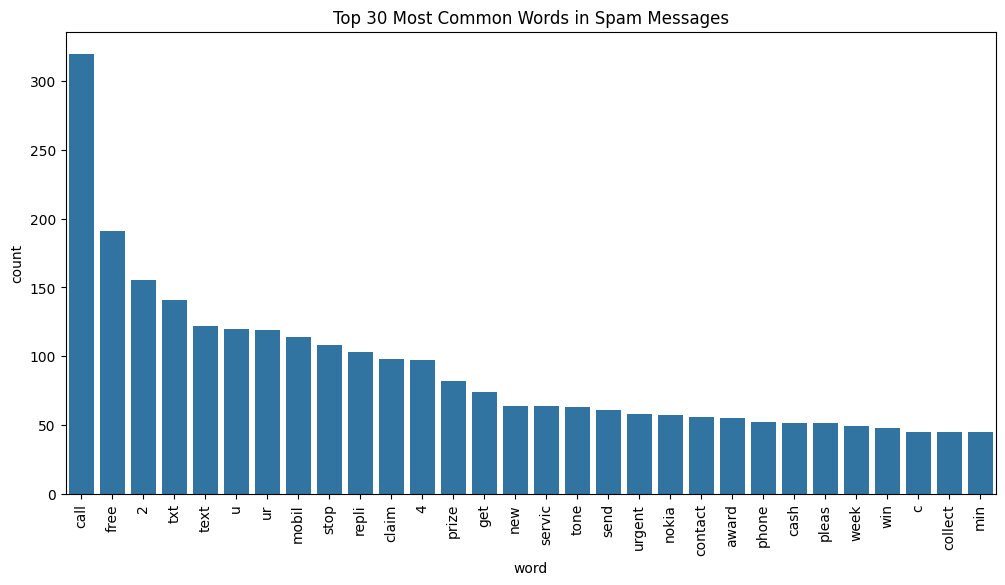

In [69]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get the 30 most common words and their counts
common_words = Counter(spam_corpus).most_common(30)

# Convert to DataFrame for seaborn
df_common = pd.DataFrame(common_words, columns=['word', 'count'])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data=df_common)
plt.xticks(rotation=90)
plt.title('Top 30 Most Common Words in Spam Messages')
plt.show()

In [71]:
ham_corpus = []
for msg in sms_df[sms_df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [72]:
len(ham_corpus)

35939

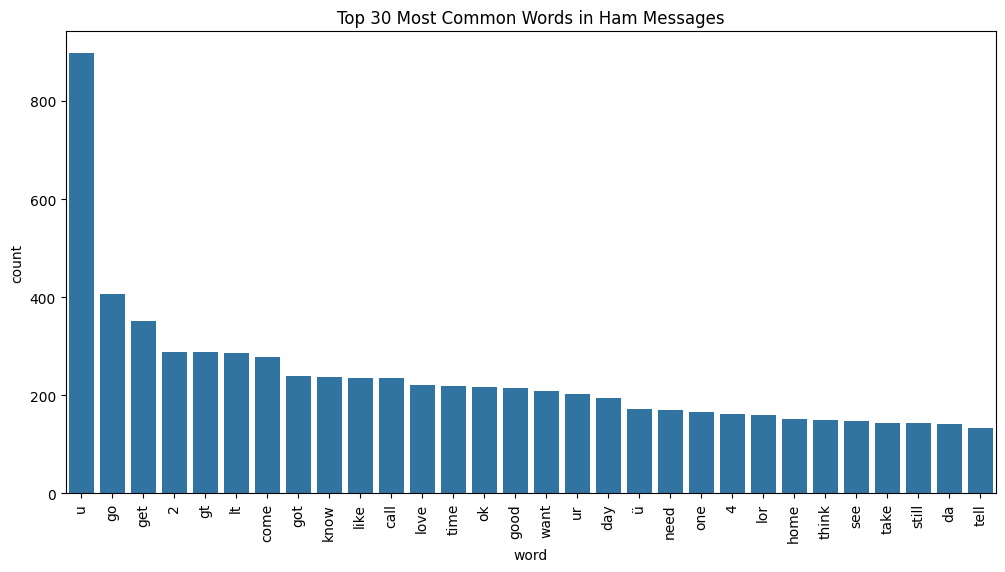

In [73]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count most common words
common_words = Counter(ham_corpus).most_common(30)

# Convert to DataFrame
df_common = pd.DataFrame(common_words, columns=['word', 'count'])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data=df_common)
plt.xticks(rotation=90)
plt.title('Top 30 Most Common Words in Ham Messages')
plt.show()

In [74]:
sms_df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### Model Building

In [124]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [125]:
X = tfidf.fit_transform(sms_df['transformed_text']).toarray()

In [126]:
X.shape

(5169, 3000)

In [127]:
y = sms_df['target'].values

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [130]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [131]:
mnb = MultinomialNB()

In [133]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9671179883945842
[[908   0]
 [ 34  92]]
1.0


In [161]:
pickle.dump(tfidf, open('tfidf_vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('spam_classifier.pkl', 'wb'))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>